In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# check the null values
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# knowing the cataegorical features
data.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [8]:
# check how many members have subscribed deposit and how many doesnt subscribed
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
# lets have a look at outliers if any

print('First quartile:', data['age'].quantile(q=0.25))
print('Second quartile:', data['age'].quantile(q=0.50))
print('Third quartile:', data['age'].quantile(q=0.75))
print('Fourth quartile:', data['age'].quantile(q=1.00))

# interquartile range -> iqr = q3-q1
print(data['age'].quantile(q=0.75) - data['age'].quantile(q=0.25))

First quartile: 32.0
Second quartile: 38.0
Third quartile: 47.0
Fourth quartile: 98.0
15.0


In [10]:
# calculate lower bound and upper bound
# lower = q1-1.5*iqr
# upper = q3+1.5*iqr

print('Upper bound: ', data['age'].quantile(q=0.75) + 1.5*(15.0), 'are outliers')

Upper bound:  69.5 are outliers


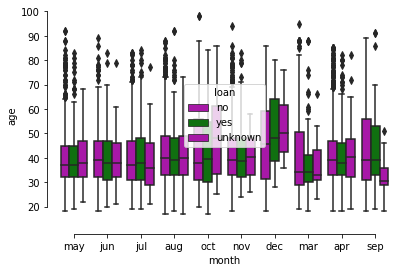

In [11]:
plt.figsize=(15,10)
sns.boxplot(x="month", y="age",
            hue="loan", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

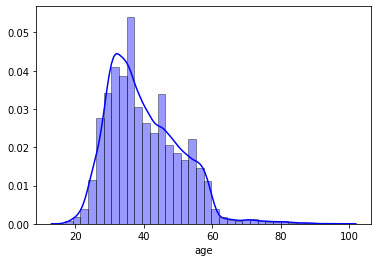

In [12]:
sns.distplot(data['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

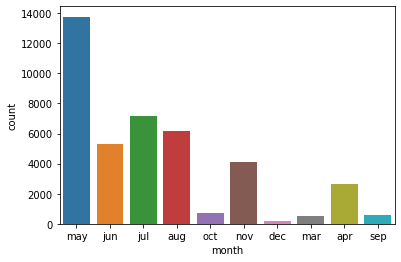

In [13]:
sns.countplot(x='month',data=data)

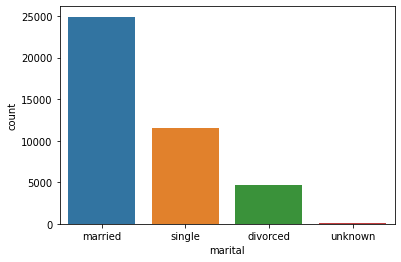

In [14]:
sns.countplot(x='marital',data=data)

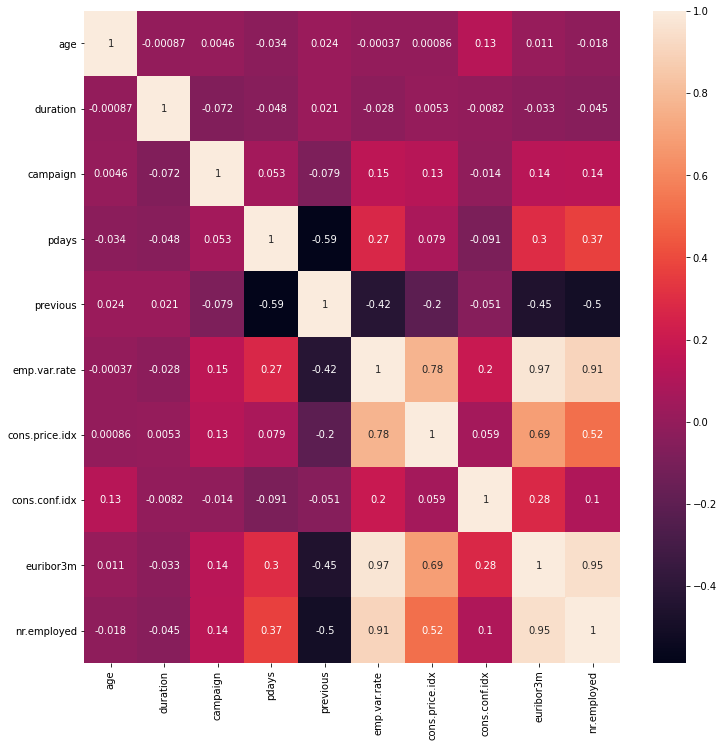

In [15]:
# find correlation
plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
# splitting data into independent and dependent features
X = data.drop('y', axis=1)
y = data['y']
print('shape of X is {x} and shape of y is {y}'.format(x = X.shape, y = y.shape))

shape of X is (41188, 20) and shape of y is (41188,)


In [17]:
# convert categorical features into numerical 
cat_cols = X.select_dtypes(include='object')
for col in cat_cols:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])

In [18]:
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,2,1,0,0,1,6,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,7,1,0,0,1,6,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,5,0,2,0,1,6,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,3,0,2,0,1,6,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [19]:
# map dependent feature to integers 0, 1
y = pd.Series(np.where(y.values == 'yes', 1, 0), y.index)

In [20]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [21]:
# split data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [22]:
print('X_train shape is {}'.format(X_train.shape))
print('X_test shape is {}'.format(X_test.shape))
print('y_train shape is {}'.format(y_train.shape))
print('y_test shape is {}'.format(y_test.shape))

X_train shape is (32950, 20)
X_test shape is (8238, 20)
y_train shape is (32950,)
y_test shape is (8238,)


In [23]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
y_pred = model.predict(X_test)
model1 = model.score(X_test, y_test)
print('Model Accuracy: {}'.format(model1))

Model Accuracy: 0.9038601602330663


In [25]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc
print(confusion_matrix(y_test,  y_pred))
print('\n')
print(classification_report(y_pred,  y_test))

[[7105  205]
 [ 587  341]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7692
           1       0.37      0.62      0.46       546

    accuracy                           0.90      8238
   macro avg       0.67      0.77      0.70      8238
weighted avg       0.93      0.90      0.92      8238



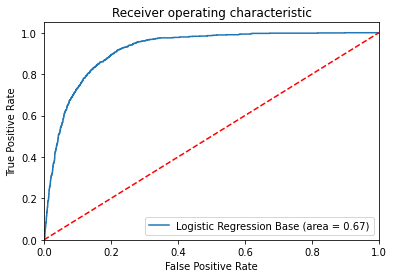

In [26]:
# roc_auc_score and roc_auc_curve

from sklearn.metrics import roc_auc_score, roc_curve, auc
prob = model.predict_proba(X_test)
predictions = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict(X_test))
auc = auc(fpr, tpr)
# plotting
plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LogReg_ROC')
plt.show()

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

Before OverSampling, counts of label '1': 3712
Before OverSampling, counts of label '0': 29238 



In [28]:
# SMOTE module
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 29238
After OverSampling, counts of label '0': 29238


In [30]:
#Outliers in %
print('Outliers are:', round(X[X['duration'] > 644.5]['duration'].count()*100/len(X),2), '%')

Outliers are: 7.19 %


In [31]:
# knn model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, pred))
print('\n')
print(round(accuracy_score(y_test, pred),2)*100)
knn_cv= (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7071  239]
 [ 523  405]]


91.0


In [33]:
# SVM model

from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(round(accuracy_score(y_test, svc_pred),2)*100)
svm_cv = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7192  118]
 [ 741  187]]
90.0


In [34]:
print(classification_report(svc_pred, y_test))
print('\n')
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7933
           1       0.20      0.61      0.30       305

    accuracy                           0.90      8238
   macro avg       0.59      0.76      0.62      8238
weighted avg       0.95      0.90      0.92      8238



              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7594
           1       0.44      0.63      0.52       644

    accuracy                           0.91      8238
   macro avg       0.70      0.78      0.73      8238
weighted avg       0.93      0.91      0.91      8238



In [35]:
# DecisionTree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print(confusion_matrix(y_test, dt_pred))
print(round(accuracy_score(y_test, dt_pred),2)*100)
dt_cv = (cross_val_score(dt, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6829  481]
 [ 431  497]]
89.0


In [36]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7260
           1       0.54      0.51      0.52       978

    accuracy                           0.89      8238
   macro avg       0.73      0.72      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [37]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred ))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
rf_cv = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7060  250]
 [ 469  459]]
91.0


In [38]:
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7529
           1       0.49      0.65      0.56       709

    accuracy                           0.91      8238
   macro avg       0.73      0.79      0.76      8238
weighted avg       0.93      0.91      0.92      8238



In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, xgb_pred ))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
xgb_cv = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7075  235]
 [ 491  437]]
91.0


In [40]:
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7566
           1       0.47      0.65      0.55       672

    accuracy                           0.91      8238
   macro avg       0.72      0.79      0.75      8238
weighted avg       0.93      0.91      0.92      8238



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbk_pred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbk_pred ))
print(round(accuracy_score(y_test, gbk_pred),2)*100)
gbk_cv = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7056  254]
 [ 460  468]]
91.0


In [42]:
print(classification_report(gbk_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7516
           1       0.50      0.65      0.57       722

    accuracy                           0.91      8238
   macro avg       0.73      0.79      0.76      8238
weighted avg       0.92      0.91      0.92      8238



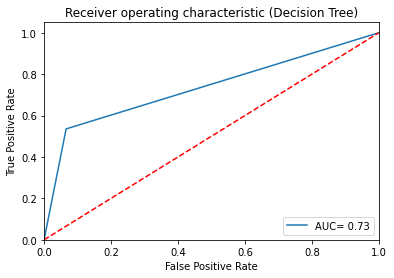

In [43]:
# roc_auc_score and roc_auc_curve

from sklearn.metrics import roc_auc_score, roc_curve, auc

prob = dt.predict_proba(X_test)
predictions = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, dt.predict(X_test))
auc = auc(fpr, tpr)

#plotting
plt.plot(fpr, tpr, label='AUC= %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.savefig('LogReg_ROC')
plt.show()

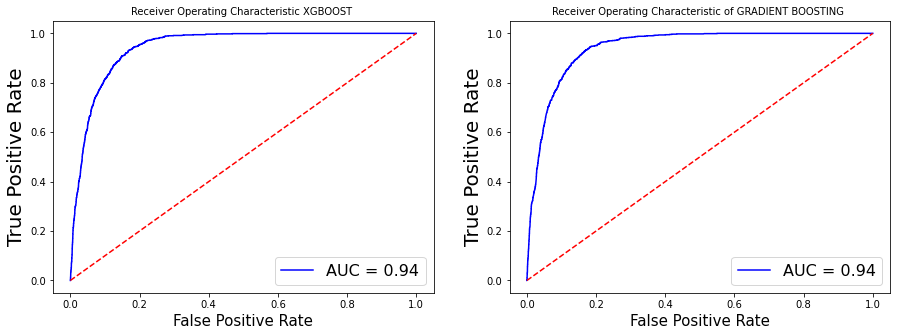

In [44]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})


#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = roc_curve(y_test, preds)
roc_aucgbk = auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic of GRADIENT BOOSTING ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

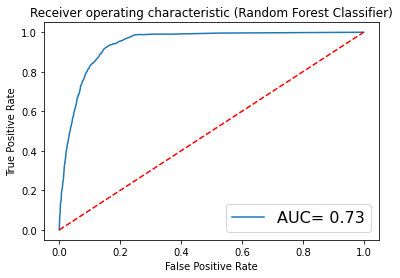

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

prob = rfc.predict_proba(X_test)
predictions = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
auc = auc(fpr, tpr)

#plotting
plt.plot(fpr, tpr, label='AUC= %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Random Forest Classifier)')
plt.legend(loc="lower right", prop={'size': 16})
plt.savefig('LogReg_ROC')
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
model1 = gnb.predict(X_test)

print(confusion_matrix(y_test, gnb_pred ))
print('\n')
print(round(accuracy_score(y_test, gnb_pred),2)*100)
gnb_cv = (cross_val_score(gnb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6388  922]
 [ 401  527]]


84.0


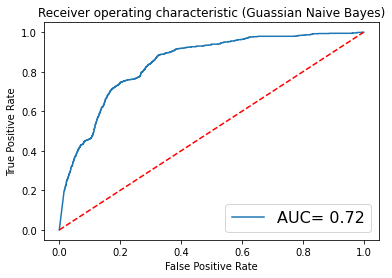

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

prob = gnb.predict_proba(X_test)
predictions = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
auc = auc(fpr, tpr)

#plotting
plt.plot(fpr, tpr, label='AUC= %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Guassian Naive Bayes)')
plt.legend(loc="lower right", prop={'size': 16})
plt.savefig('LogReg_ROC')
plt.show()

In [48]:
# Feature scaling on x_train and x_test
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [49]:
# importing keras libraries

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

Using TensorFlow backend.


In [50]:
# Initializing ANN 

Classifier = Sequential()

In [51]:
#  Adding input layer and first hidden layer

Classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 20))

# adding second hidden layer

Classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# adding the output layer, we use sigmoid activation function coz our target feature is binary classification

Classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [52]:
# compiling ANN 
# we use loss function as binary crossentropy coz we have target feature as binary classification 

Classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
X.shape

(41188, 20)

In [54]:
# fit the ann model in training set

model = Classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)
# # predict the test set results

# y_pred = Classifier.predict(np.array(X_test))
# y_pred = (y_pred > 0.5)

Train on 22076 samples, validate on 10874 samples
Epoch 1/100
22076/22076 [==============================] - 8s 376us/step - loss: 0.3154 - accuracy: 0.8891 - val_loss: 0.2727 - val_accuracy: 0.8839
Epoch 2/100
22076/22076 [==============================] - 6s 292us/step - loss: 0.2392 - accuracy: 0.8888 - val_loss: 0.2322 - val_accuracy: 0.8853
Epoch 3/100
22076/22076 [==============================] - 6s 289us/step - loss: 0.2138 - accuracy: 0.8907 - val_loss: 0.2172 - val_accuracy: 0.8937
Epoch 4/100
22076/22076 [==============================] - 6s 291us/step - loss: 0.2048 - accuracy: 0.9051 - val_loss: 0.2125 - val_accuracy: 0.9020
Epoch 5/100
22076/22076 [==============================] - 6s 290us/step - loss: 0.2012 - accuracy: 0.9077 - val_loss: 0.2102 - val_accuracy: 0.9020
Epoch 6/100
22076/22076 [==============================] - 6s 291us/step - loss: 0.1990 - accuracy: 0.9084 - val_loss: 0.2086 - val_accuracy: 0.9019
Epoch 7/100
22076/22076 [==============================]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


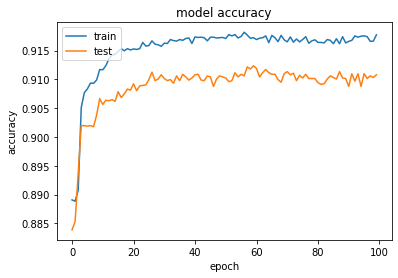

In [55]:
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

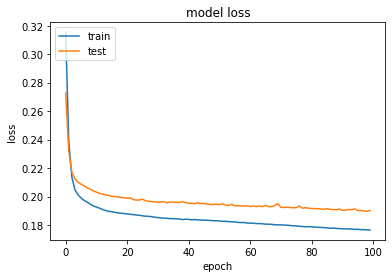

In [56]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# predict the test set results

y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [58]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[7067,  243],
       [ 517,  411]])

In [60]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9077445982034474

In [61]:
# perform hyperparameter optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
def create_model(layers, activation):
   model = Sequential()
   for i, nodes in enumerate(layers):
     if i==0:
       model.add(Dense(nodes,input_dim=X_train.shape[1]))
       model.add(Activation(activation))
       model.add(Dropout(0.3))
     else:
       model.add(Dense(nodes))
       model.add(Activation(activation))
       model.add(Dropout(0.3))

   model.add(Dense(units = 1,  kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   return model 

In [63]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [64]:
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [65]:
grid_result = grid.fit(X_train, y_train)

In [66]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.9148406744003296
{'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)}
